<a href="https://colab.research.google.com/github/dyjdlopez/intro_2_quantum/blob/main/qiskit/01_02_quantum_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Quantum Progamming: Quantum Circuits
$_{\text{Made by: @dyjdlopez}}$

Quantum programming is the process of creating algorithms and simulations that harness the principles of quantum mechanics to solve problems in ways that classical computing cannot. Unlike classical bits, qubits exhibit superposition, entanglement, and quantum interference, offering fundamentally new computational possibilities.

**Quantum circuits** are at the heart of quantum programming. A quantum circuit consists of sequences of quantum gates: operations that manipulate the state of one or more qubits with precision and control that is not possible classically. In particular, multi-qubit gates enable the creation of entanglement and correlated quantum states, giving rise to computational phenomena unique to quantum computers.

In [5]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.1 MB/s eta 0:00:00


In [32]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit import transpile

## 1. Review of Single-Qubit Quantum Gates


Quantum computation starts with the manipulation and observation of individual qubits. Single-qubit gates, introduced in Section 1.3.1 of the previous notebook, provide the essential operations for state preparation, rotation, and phase shifts. These gates are the Hadamard, Pauli ($X$, $Y$, $Z$), phase ($S$), and $T$ gates which are represented by unitary matrices, and their combined action enables the creation of complex quantum states.

While single-qubit gates allow us to exploit phenomena such as superposition, the true computational power of quantum circuits emerges through carefully combining gates and reading out results. **Measurement** is the critical process for extracting classical information from quantum states. When a qubit is measured, its superposed state collapses irreversibly into one of the basis states ($|0⟩$ or $|1⟩$), yielding either $0$ or $1$ in a classical register.

In **Qiskit**, both gate operations and measurement are implemented intuitively:
- Gates are applied using simple Python methods attached to the `QuantumCircuit` class (see your previous notes for explicit syntax and matrix forms).
- The [`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) operation connects a qubit to a classical bit, recording the circuit’s output for analysis.

Together, single-qubit gateways and measurement form the foundational layer for building and understanding more advanced quantum circuits. In the next sections, we expand this toolkit to include **multi-qubit operations** and more powerful computational constructs.



In [7]:
simulator = AerSimulator()

# Create a single-qubit circuit
qc = QuantumCircuit(1,1)
qc.h(0)  # Apply a gate

qc.measure(0,0)

compiled_circuit = transpile(qc, simulator)


job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 492, '0': 508}


## 2. Multi-Qubit Memory and Quantum Registers

In quantum computing, information is often stored and manipulated in systems with **multiple qubits**. When combining qubits, their joint state is represented using the *tensor product* (or *Kronecker product*) of individual qubit states. This extended system forms what is known as a **quantum register**.

### 2.1 Quantum Registers and State Notation

A **quantum register** is a collection of qubits that can jointly represent complex, entangled quantum states. If a single qubit can exist in a superposition of $|0\rangle$ and $|1\rangle$, then an $n$-qubit register can exist in a superposition of $2^n$ basis states.

For example, a two-qubit register has four computational basis states:
$$
|00\rangle, \quad |01\rangle, \quad |10\rangle, \quad |11\rangle
$$

If qubit $A$ is in state $|\psi_A\rangle$ and qubit $B$ is in state $|\psi_B\rangle$, their combined state is written as a tensor product:
$$
|\psi_{AB}\rangle = |\psi_A\rangle \otimes |\psi_B\rangle
$$
This operation expands the dimensionality of the system, allowing for correlated or *entangled* relationships between the qubits.





In [12]:
ket_A = np.array([[1], [0]])
ket_B = np.array([[0], [1]])
# Compute the tensor (Kronecker) product to form the 2-qubit register

ket_psi = np.kron(ket_0, ket_1)

print("State |0>:", ket_0, sep='\n')
print("State |1>:", ket_1, sep='\n')
print("Tensor (Kronecker) product |0> ⊗ |1> = |01> state:", ket_psi, sep='\n')

State |0>:
[[1]
 [0]]
State |1>:
[[0]
 [1]]
Tensor (Kronecker) product |0> ⊗ |1> = |01> state:
[[0]
 [1]
 [0]
 [0]]


### 2.2 Outer Products and Density Matrices

To describe measurement probabilities and system statistics, we often use **outer products** to construct operators from statevectors.

The outer product of a ket (column vector) $|\psi\rangle$ and its corresponding bra (row vector) $\langle \psi|$ is defined as:
$$
|\psi\rangle \langle \psi| = \text{density matrix of } |\psi\rangle
$$
This matrix, often called the **projector**, acts as a linear operator projecting any vector onto $|\psi\rangle$. It plays a key role in quantum measurement theory and mixed-state formalism.

For example, the computational basis states correspond to the following projectors:
$$
|0\rangle\langle0| = \begin{pmatrix}1 & 0\\ 0 & 0\end{pmatrix}, \quad
|1\rangle\langle1| = \begin{pmatrix}0 & 0\\ 0 & 1\end{pmatrix}
$$

In **Qiskit**, a quantum register is defined as a collection of qubits using the `QuantumRegister` class. This register forms the memory space for multi-qubit operations:

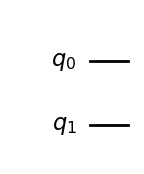

In [17]:
num_qubits = 2
qc = QuantumCircuit(num_qubits)

qc.draw('mpl')

Density matrix:
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


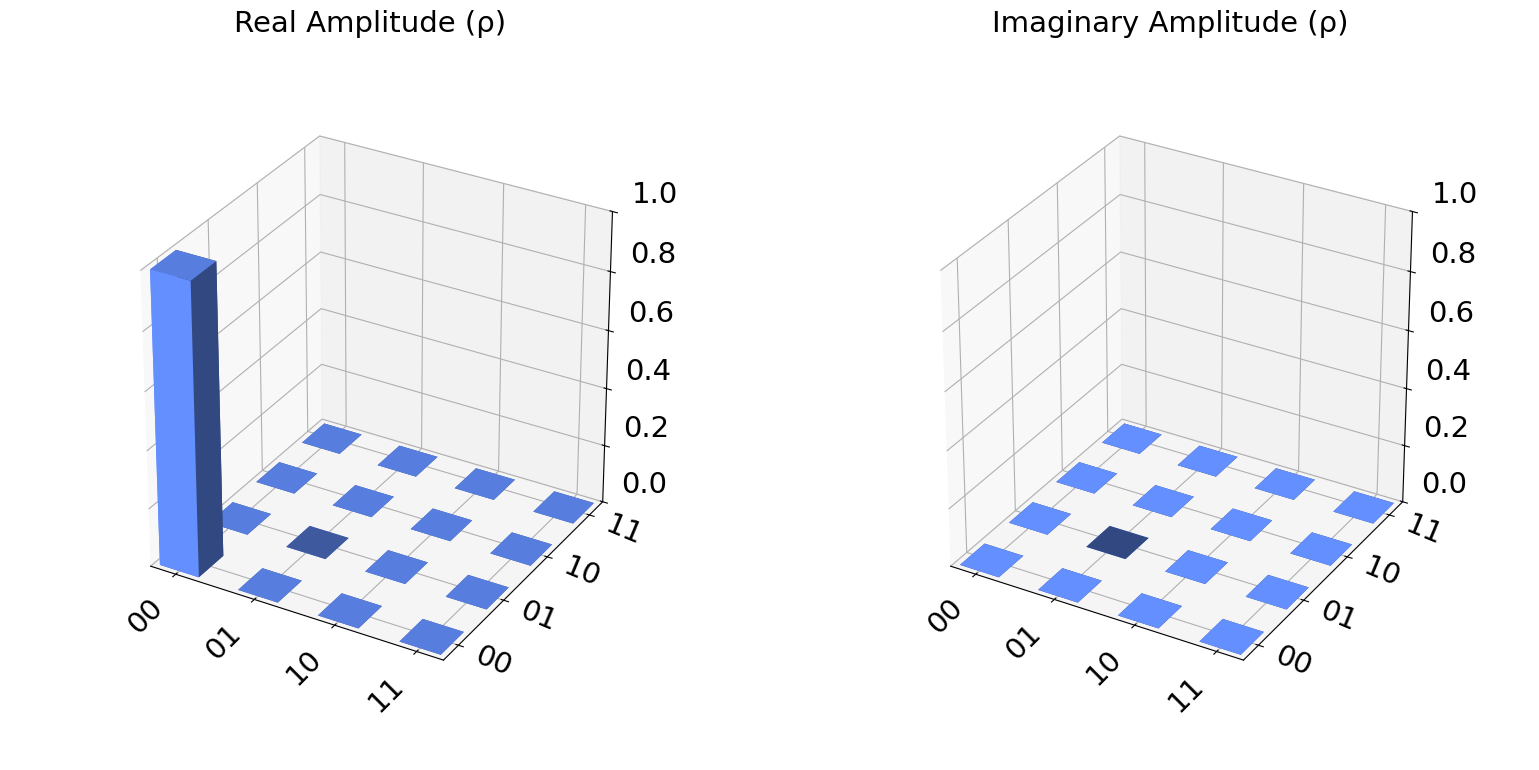

In [19]:
# Get the statevector of the quantum circuit
statevector = Statevector.from_instruction(qc)

# Convert statevector to density matrix
density_matrix = DensityMatrix(statevector)

print("Density matrix:\n", density_matrix.data)

# Optional: visualize the density matrix
plot_state_city(density_matrix)

## 3. Two-Qubit Gates

Multi-qubit gates enable quantum circuits to create entanglement and perform conditional logic. These gates act across two or more qubits and play a central role in quantum algorithms.

### 3.1 CNOT (Controlled-NOT) Gate

The **CNOT gate** flips the target qubit if the control qubit is $|1\rangle$. Its matrix representation:
$$
\text{CNOT} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

**Truth table for CNOT:**

| Control (Q0) | Target (Q1) | Output Q0 | Output Q1 |
|--------------|-------------|-----------|-----------|
|      0       |      0      |     0     |     0     |
|      0       |      1      |     0     |     1     |
|      1       |      0      |     1     |     1     |
|      1       |      1      |     1     |     0     |

**Qiskit example:**



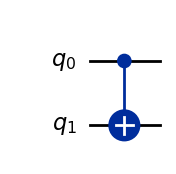

In [20]:
qc = QuantumCircuit(2)
qc.cx(0, 1) # CNOT: qubit 0 is control, qubit 1 is target

qc.draw('mpl')

In [21]:
## Let's validate the CNOT Truth table:

simulator = AerSimulator()

print("CNOT Truth Table Validation:")
print("Input Q0 Q1 | Output Q0 Q1")
print("-----------------------------")

for ctrl in [0, 1]:
    for tgt in [0, 1]:
        qc = QuantumCircuit(2, 2)

        # Initialize state
        if ctrl == 1:
            qc.x(0)
        if tgt == 1:
            qc.x(1)

        # Apply CNOT gate
        qc.cx(0, 1)

        # Add measurements
        qc.measure([0, 1], [0, 1])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=1000)
        result = job.result()
        counts = result.get_counts()

        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output is in little-endian order (Q1Q0), so reverse for Q0 Q1
        print(f"    {ctrl}   {tgt}   |   {output[1]}   {output[0]}")

CNOT Truth Table Validation:
Input Q0 Q1 | Output Q0 Q1
-----------------------------
    0   0   |   0   0
    0   1   |   0   1
    1   0   |   1   1
    1   1   |   1   0


### 3.2 SWAP Gate

The **SWAP gate** is a two-qubit gate that exchanges the states of its two qubits. It does not require a control qubit; the operation is unconditional.

**Matrix representation:**

The SWAP gate is represented by a $4 \times 4$ matrix:
$$
SWAP =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$
This matrix swaps the $|01\rangle$ and $|10\rangle$ basis states, leaving $|00\rangle$ and $|11\rangle$ unchanged.

**Truth table for SWAP:**

| Input Q0 | Input Q1 | Output Q0 | Output Q1 |
|----------|----------|-----------|-----------|
|    0     |    0     |     0     |     0     |
|    0     |    1     |     1     |     0     |
|    1     |    0     |     0     |     1     |
|    1     |    1     |     1     |     1     |

The SWAP gate is commonly used in quantum circuits for rearranging qubits, especially when mapping logical qubits to physical hardware with limited connectivity.

**Qiskit Example:**

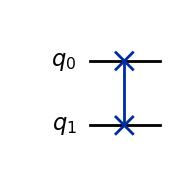

In [22]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.draw('mpl')

### 3.3 Controlled Gates

**Controlled gates** extend single- or multi-qubit gates by adding a *control qubit* that determines when the operation should occur. These gates are fundamental in creating entanglement and conditional logic within quantum circuits.

#### Controlled-Z (CZ) Gate

The **CZ gate** applies a Pauli-Z operation to the target qubit **only when** the control qubit is $|1\rangle$. Its matrix representation on two qubits:
$$
\text{CZ} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$$
This gate flips the sign (phase) of the $|11\rangle$ state.

**Qiskit example:**

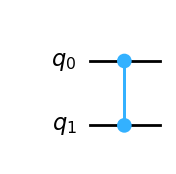

In [24]:
qc = QuantumCircuit(2)
qc.cz(0, 1)
qc.draw('mpl')

#### Controlled-Phase (CPhase) Gate

The **CPhase gate** applies a phase rotation by $\phi$ to the $|11\rangle$ state (i.e., when both qubits are $|1\rangle$). Its matrix form (for phase $\phi$):
$$
\text{CPhase}(\phi) =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\phi}
\end{pmatrix}
$$
The CZ gate is a special case with $\phi = \pi$.

**Qiskit example:**

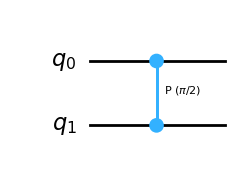

In [25]:
qc = QuantumCircuit(2)
qc.cp(np.pi/2, 0, 1) # CPhase gate with phase pi/2
qc.draw('mpl')

#### General Controlled Gates: Making Any Gate Controlled

Many gates in Qiskit can be "controlled", turning a gate $U$ into a controlled-$U$ (CU) operation. The general principle:
- The operation $U$ is applied **only if** the control qubit is $|1\rangle$.
- If the control is $|0\rangle$, the target qubits are unchanged.

In Qiskit, you can create a controlled version of *almost any* gate using the `.control()` method on a gate object. For example:

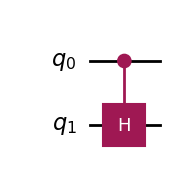

In [28]:
from qiskit.circuit.library import HGate
qc = QuantumCircuit(2)
c_h = HGate().control(1)  # 1 control qubit, controlled-Hadamard gate
qc.append(c_h, [0, 1])    # control on qubit 0, H on qubit 1
qc.draw('mpl')


### 3.4 Phase Kickback

**Phase kickback** is a fundamental effect in quantum circuits where the application of a controlled phase operation causes a phase change (kickback) on the control qubit rather than the target qubit. This phenomenon is essential in quantum algorithms, including the quantum Fourier transform and phase estimation.

Normally, when a phase gate is applied to a qubit, it shifts the relative phase between its basis states. However, in controlled operations, if the target qubit is in a superposition, the *phase* can appear on the **control** qubit due to quantum entanglement and the tensor structure of the circuit.

Consider the action of a controlled-phase (CP or CZ) gate:

- If the control qubit is in $|1\rangle$ and the target is in $|1\rangle$, a phase $e^{i\phi}$ is applied.
- But if the target is in a superposition, the resulting global phase can be transferred ("kickback") to the control qubit.

#### Example: Controlled-$Z$ on Superposed Target

Suppose we start with:
$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle
$$

Apply a CZ (controlled-$Z$) gate:
$$
\text{CZ} \left[ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle \right]
= \frac{1}{\sqrt{2}}(|0\rangle \otimes |1\rangle - |1\rangle \otimes |1\rangle)
$$

Notice that the sign (phase) has flipped **on the control qubit’s $|1\rangle$ component** due to the target being $|1\rangle$.

#### Why Phase Kickback Matters

Phase kickback is exploited in quantum algorithms to:
- Extract the eigenphase of an operator using quantum phase estimation
- Implement modular exponentiation in Shor’s algorithm
- Enable interference patterns central to quantum computation

#### Qiskit Demonstration

Below is a simple demonstration: applying a controlled-$Z$ (CZ) gate to a superposed target and observing the resulting statevector.



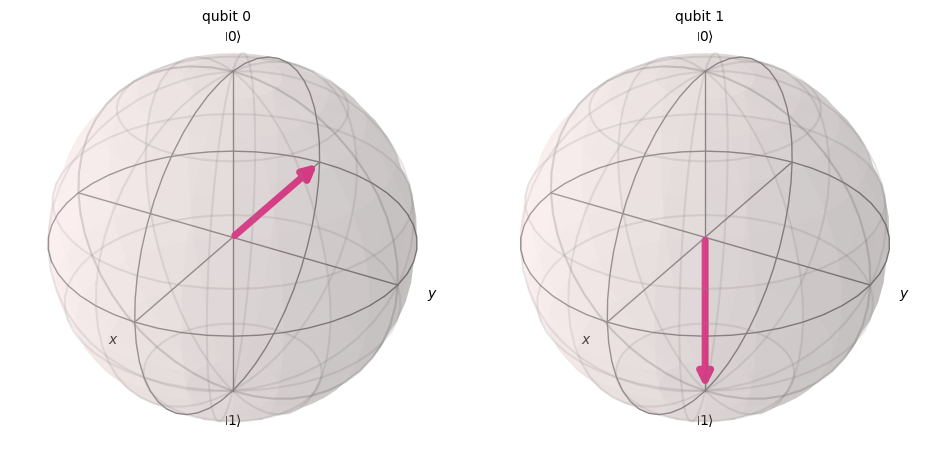

In [37]:
# Create a 2-qubit circuit
qc = QuantumCircuit(2)

# Prepare control qubit in superposition
qc.h(0)
# Prepare target qubit in |1>
qc.x(1)
# Apply controlled-Z
qc.cz(0, 1)

# Get the resulting statevector
sv = Statevector.from_instruction(qc)

# Visualize the Bloch spheres
plot_bloch_multivector(sv)

## 4. Entanglement

Entanglement is one of the most distinctive and powerful features of quantum mechanics. In quantum circuits, **entanglement** means two or more qubits are linked so that their joint state cannot be described independently of one another. As a result, operations or measurements on one qubit can instantaneously affect the state of the other, no matter the distance between them.

### 4.1 Creating Entanglement with Two-Qubit Gates

Two-qubit gates such as the **CNOT** (Controlled-NOT) and **CZ** (Controlled-Z) gates are essential for generating entanglement in quantum circuits. Single-qubit gates alone cannot produce an entangled state from a set of independent (separable) qubits.

#### Example: Creating a Bell Pair (Maximally Entangled State)

The simplest way to generate entanglement between two qubits is to create a **Bell state** (or EPR pair), which is a maximally entangled two-qubit state. One common Bell state is:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
$$

This state is special because neither qubit has a definite state on its own, but measurements on one instantly reveal the state of the other.


#### The Four Bell States

The Bell basis consists of four maximally entangled two-qubit states:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
$$

These states cannot be factored into individual qubit states and form the foundation for quantum teleportation, superdense coding, and many quantum algorithms.


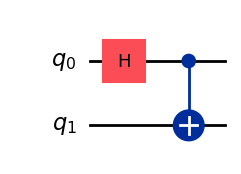

In [59]:
qc = QuantumCircuit(2)
qc.h(0) # Put the first qubit in superposition
qc.cx(0, 1) # Entangle with the second qubit using CNOT

## Let's try to apply an operation post-entanglement
# qc.s(0)
qc.draw('mpl')


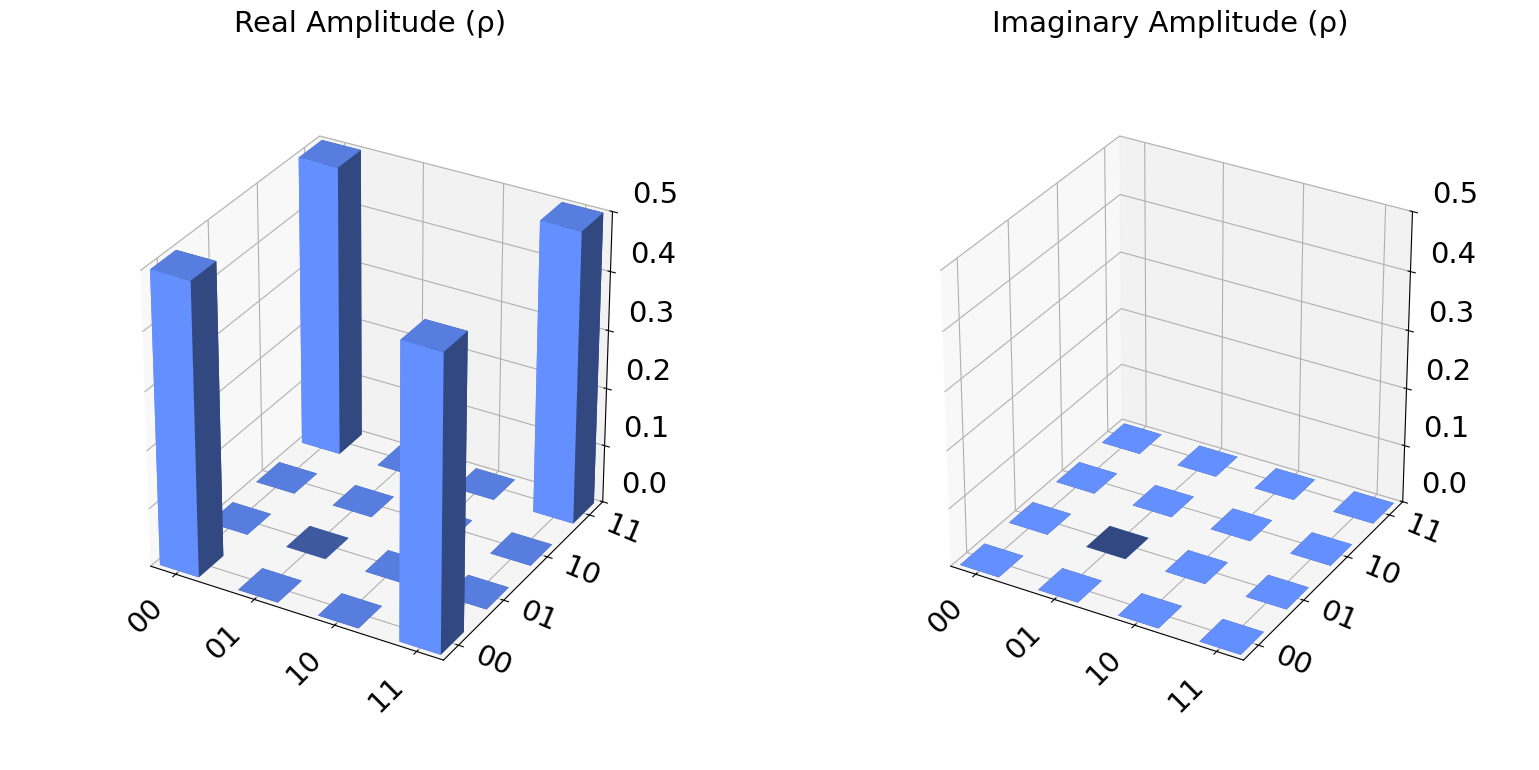

In [60]:
state = Statevector.from_instruction(qc)
plot_state_city(state)

## 5. Operations Beyond Two Qubits

As quantum circuits scale past two qubits, new classes of operations and gates arise that enable complex, multi-qubit algorithms and protocols central to quantum computing.

#### Circuit Complexity and Practical Considerations

As the number of qubits in a circuit increases, the number of basis states grows exponentially ($2^n$ for $n$ qubits), quickly expanding the computational and memory footprint. Multi-qubit gates increase circuit depth and can be challenging to implement physically due to hardware connectivity and noise.



- **Fredkin (CSWAP) Gate:** Another three-qubit gate, performing a SWAP on the two target qubits if the control qubit is $|1\rangle$. The Fredkin gate is important in quantum simulations and conservative logic design.

- **Generalized Controlled Gates:**
  Many quantum algorithms require gates controlled by more than one qubit. In Qiskit (and other frameworks), you can create arbitrary multi-controlled gates using gate objects and the `.control(n)` method, where $n$ is the number of controlling qubits. These gates underpin complex logical structures like quantum arithmetic, modular exponentiation, and oracles.






### 5.1 Multi-Qubit Gates

**Toffoli (CCNOT) Gate**

The **Toffoli gate** (Controlled-Controlled-NOT or CCNOT) is a three-qubit gate with two control qubits and one target. It flips (NOT) the target qubit **only if both controls are $|1\rangle$**.

This gate is universal for reversible classical computation, and it is widely used in quantum error correction and arithmetic routines.

**Matrix representation:**

The Toffoli gate operates in the eight-dimensional Hilbert space of three qubits:

$$
\text{CCX} =
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}
$$

**Truth table:**

| Control 1 (Q0) | Control 2 (Q1) | Target (Q2) | Output Q0 | Output Q1 | Output Q2 |
|:-------------:|:-------------:|:----------:|:---------:|:---------:|:---------:|
|       0       |       0       |     0      |     0     |     0     |     0     |
|       0       |       0       |     1      |     0     |     0     |     1     |
|       0       |       1       |     0      |     0     |     1     |     0     |
|       0       |       1       |     1      |     0     |     1     |     1     |
|       1       |       0       |     0      |     1     |     0     |     0     |
|       1       |       0       |     1      |     1     |     0     |     1     |
|       1       |       1       |     0      |     1     |     1     |     1     |
|       1       |       1       |     1      |     1     |     1     |     0     |

- For all rows except when both controls are 1, the target passes through unchanged.
- When both controls are 1, the target bit is flipped.

**Qiskit example:**

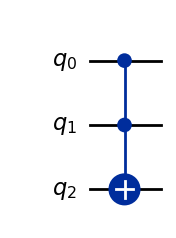

In [55]:
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)  # Toffoli: controls on qubits 0 and 1, target on qubit 2
qc.draw('mpl')

In [56]:
simulator = AerSimulator()

print("Toffoli (CCNOT) Truth Table Validation:")
print("Input Q0 Q1 Q2 | Output Q0 Q1 Q2")
print("-----------------------------------")

for c1 in [0, 1]:
    for c2 in [0, 1]:
        for tgt in [0, 1]:
            qc = QuantumCircuit(3, 3)

            # Initialize state
            if c1 == 1:
                qc.x(0)
            if c2 == 1:
                qc.x(1)
            if tgt == 1:
                qc.x(2)

            # Apply Toffoli (CCNOT) gate
            qc.ccx(0, 1, 2)

            # Measure all qubits
            qc.measure([0, 1, 2], [0, 1, 2])

            # Compile and run
            compiled_circuit = transpile(qc, simulator)
            job = simulator.run(compiled_circuit, shots=1000)
            result = job.result()
            counts = result.get_counts()

            # Should be single output key (deterministic)
            output = list(counts.keys())[0]

            # Output ordering: Q2 Q1 Q0, so reverse for Q0 Q1 Q2
            print(f"    {c1}   {c2}   {tgt}   |   {output[2]}   {output[1]}   {output[0]}")


Toffoli (CCNOT) Truth Table Validation:
Input Q0 Q1 Q2 | Output Q0 Q1 Q2
-----------------------------------
    0   0   0   |   0   0   0
    0   0   1   |   0   0   1
    0   1   0   |   0   1   0
    0   1   1   |   0   1   1
    1   0   0   |   1   0   0
    1   0   1   |   1   0   1
    1   1   0   |   1   1   1
    1   1   1   |   1   1   0


**Fredkin (CSWAP) Gate**

The **Fredkin gate** (Controlled-SWAP or CSWAP) is a three-qubit gate with one control qubit and two target qubits. It swaps the two targets **if and only if** the control qubit is $|1\rangle$. Otherwise, it leaves the targets unchanged.

This gate is important in reversible computation and quantum error correction.

**Matrix representation:**

The Fredkin gate acts in the three-qubit (8-dimensional) space:

\[
\text{CSWAP} =
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
\]

**Truth table:**

| Control (Q0) | Target 1 (Q1) | Target 2 (Q2) | Output Q0 | Output Q1 | Output Q2 |
|:-----------:|:-------------:|:-------------:|:---------:|:---------:|:---------:|
|      0      |       0       |       0       |     0     |     0     |     0     |
|      0      |       0       |       1       |     0     |     0     |     1     |
|      0      |       1       |       0       |     0     |     1     |     0     |
|      0      |       1       |       1       |     0     |     1     |     1     |
|      1      |       0       |       0       |     1     |     0     |     0     |
|      1      |       0       |       1       |     1     |     1     |     0     |
|      1      |       1       |       0       |     1     |     0     |     1     |
|      1      |       1       |       1       |     1     |     1     |     1     |

- If the control is 0, the targets pass through unchanged.
- If the control is 1, the target values are swapped.

**Qiskit example:**


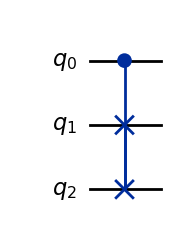

In [57]:
qc = QuantumCircuit(3)
qc.cswap(0, 1, 2) # Control: qubit 0; Targets: qubits 1 and 2
qc.draw('mpl')


### 5.2 Entanglement Across Multiple Qubits

The **GHZ state** (Greenberger-Horne-Zeilinger)  is an important multi-qubit generalization of the Bell state. It is a quantum state of three or more qubits that represents maximal entanglement across all participants. GHZ states are used in quantum information protocols, nonlocality experiments, and quantum error correction.

**Definition (3 qubits):**

$$
|\text{GHZ}_3\rangle = \frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)
$$

This state cannot be separated into individual qubit states—each qubit is fully entangled with the others. Measuring any one qubit immediately determines the state of the rest.

**General form:**  
For $n$ qubits,
$$
|\text{GHZ}_n\rangle = \frac{1}{\sqrt{2}} (|00\cdots0\rangle + |11\cdots1\rangle)
$$

**Circuit Preparation:**  
To create a GHZ state for 3 qubits:
1. Apply a Hadamard gate to the first qubit to create superposition.
2. Apply a CNOT gate from the first qubit to the second, entangling them into a Bell pair.
3. Apply a CNOT from the first qubit to the third—now all three are entangled.

**Qiskit example:**

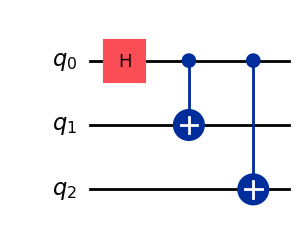

In [58]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

qc.draw('mpl')

### 6. Formulating Algorithms as Quantum Circuits

Quantum algorithms are typically expressed as sequential operations—quantum gates—arranged into **quantum circuits** that encode both the data and logic of computation. Each line (or wire) in a circuit represents a qubit, and gates manipulate these qubits' states. By designing the sequence and configuration of gates, you construct algorithms that use the unique properties of quantum mechanics, such as superposition and entanglement.

#### Ancilla Qubits

In many quantum algorithms, you need extra qubits called **ancilla** (or helper) qubits for temporary storage, workspace for intermediate results, or facilitating measurements and operations that aren't possible in the original register alone.

Ancilla qubits are typically initialized to $|0\rangle$ and, for clean computation, should generally be returned to $|0\rangle$ before the end of the algorithm to avoid unwanted entanglement or measurement artifacts.

#### Example: XOR Operation with an Ancilla Qubit

Suppose you want to compute $\mathrm{XOR}(a, b)$ for two classical input bits $a$ and $b$, and store the result in an ancilla qubit. In quantum circuits, this is naturally done using CNOT gates:

1. Start with three qubits: $q_0$ holds $a$, $q_1$ holds $b$, $q_2$ (ancilla) starts in $|0\rangle$.
2. Apply CNOT from $q_0$ to $q_2$ (copies bit $a$ into the ancilla).
3. Apply CNOT from $q_1$ to $q_2$ (flips the ancilla if $b = 1$).
4. Now $q_2$ contains $a \oplus b$.

**Qiskit Example:**


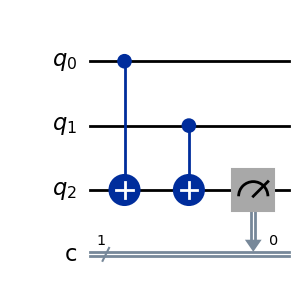

In [68]:
# Suppose a = 1, b = 0
qc = QuantumCircuit(3, 1)
# q1 (b) is already 0

# Compute a XOR b in ancilla q2
qc.cx(0, 2)
qc.cx(1, 2)

# Measure all qubits
qc.measure(2, 0)

qc.draw('mpl')

In [70]:

simulator = AerSimulator()

print("XOR with Ancilla Truth Table Validation:")
print("Input A B | Output A B XOR")
print("---------------------------")

for a in [0, 1]:
    for b in [0, 1]:
        qc = QuantumCircuit(3, 3)

        # Initialize input states
        if a == 1:
            qc.x(0)  # Set qubit 0 (A) to 1
        if b == 1:
            qc.x(1)  # Set qubit 1 (B) to 1
        # Qubit 2 (ancilla) starts in |0⟩

        # Compute A XOR B in ancilla qubit 2
        qc.cx(0, 2)  # Copy A to ancilla
        qc.cx(1, 2)  # XOR B with ancilla

        # Measure all qubits
        qc.measure([0, 1, 2], [0, 1, 2])

        # Compile and run
        compiled_circuit = transpile(qc, simulator)
        job = simulator.run(compiled_circuit, shots=1000)
        result = job.result()
        counts = result.get_counts()

        # Get the result (should be deterministic)
        output = list(counts.keys())[0]

        # Output ordering: Q2 Q1 Q0, so reverse for Q0 Q1 Q2
        print(f"    {a}   {b}   |   {output[2]}   {output[1]}   {output[0]}")


XOR with Ancilla Truth Table Validation:
Input A B | Output A B XOR
---------------------------
    0   0   |   0   0   0
    0   1   |   0   1   1
    1   0   |   1   0   1
    1   1   |   1   1   0


#### Example: XOR—Irreversible vs. Reversible Form

Consider the XOR operation on two bits, $a$ and $b$:

**Irreversible (Classical) XOR:**
  - Input: $a, b$
  - Output: $c = a \oplus b$
  - **Information Loss:** Given only $c$, the original values of $a$ and $b$ cannot be reconstructed.

For instance, if you know only that $c=1$, both $(a=0, b=1)$ and $(a=1, b=0)$ are possible input pairs.

**Qiskit Example: Irreversible XOR with Ancilla**

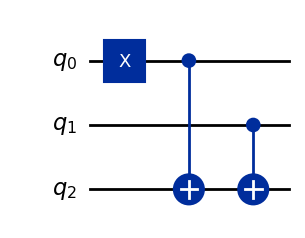

In [72]:
qc = QuantumCircuit(3)
qc.x(0)        # Set a = 1, b = 0 (adjust for different inputs)
# qc.x(1)      # Uncomment to set b = 1

# Ancilla (qubit 2) initialized to |0⟩
qc.cx(0, 2)    # Copy a to ancilla
qc.cx(1, 2)    # XOR b with ancilla (now ancilla = a XOR b)

qc.draw('mpl')

This XOR circuit with ancilla correctly computes $ a \oplus b $ in qubit 2, but the input qubits (q0, q1) are **not reset** after computation. To fully "clean up" and restore q0, q1 to $|0\rangle$, add explicit reset/uncompute steps after the XOR.

To restore q0, q1 to \(|0\rangle\), add these uncompute steps at the end:

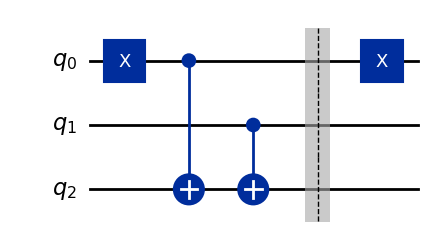

In [73]:
qc.barrier()
qc.x(0)

qc.draw('mpl')

You can validate the reversibility by applying the simulation test we did with the CCX gate. Check the different between the irreversible and reversible form.

---

---
$$_{\text{END OF FILE}}$$
$$_{\text{D.J.D. Lopez | © 2025}}$$